In [ ]:
import numpy as np

import numpy as np

def make_grid_through_point(xy_point, spacing, xlim, ylim):
    """
    주어진 점 (x, y)을 반드시 포함하는 일정 간격의 격자 생성.

    Parameters
    ----------
    xy_point : tuple(float, float)
        반드시 포함해야 하는 점 (x, y)
    spacing : float
        격자 간격 (dx = dy = spacing)
    xlim : tuple(float, float)
        x 최소, 최대 범위
    ylim : tuple(float, float)
        y 최소, 최대 범위

    Returns
    -------
    X, Y : 2D numpy array
        np.meshgrid 형태의 x, y 좌표 격자
    """
    x0, y0 = xy_point
    xmin, xmax = xlim
    ymin, ymax = ylim

    # 기준점을 spacing에 맞춰 정렬
    x_start = x0 - spacing * np.floor((x0 - xmin) / spacing)
    y_start = y0 - spacing * np.floor((y0 - ymin) / spacing)

    xs = np.arange(x_start, xmax + spacing * 0.5, spacing)
    ys = np.arange(y_start, ymax + spacing * 0.5, spacing)

    X, Y = np.meshgrid(xs, ys, indexing='xy')
    return X, Y

def points_in_circle(xc, yc, r, xs, ys):
    X, Y = np.meshgrid(xs, ys, indexing='xy')
    mask = (X - xc)**2 + (Y - yc)**2 <= r**2
    return np.vstack([X[mask], Y[mask]]).T


W,H = 1000,1000
sample = np.random.randn(1000,1000)

boxes = []


#corner
center = (500,500)
SL1x = 200
SL1y = 200
SL2x = 400
SL2y = 400

h1 = 500
box1 = (0,
        0,
        center[0]-int(SL1x/2),
        center[0]-int(SL1y/2),
        h1) #왼쪽 위
box2 = (0,
        center[1]+int(SL1y/2),
        center[0]-int(SL1x/2),
        H,
        h1) #왼쪽 아래
box3 = (center[0]+int(SL1x/2),
        0,
        W,
        center[1]-int(SL1y/2),
        h1) #오른쪽 위
box4 = (center[0]+int(SL1x/2),
        center[1]+int(SL1y/2),
        W,
        H,
        h1) #오른쪽 아래


subbox1 = (0,
        0,
        center[0]-int(SL2x/2),
        center[0]-int(SL2y/2),
        200) #왼쪽 위
subbox2 = (0,
        center[1]+int(SL2y/2),
        center[0]-int(SL2x/2),
        H,
        200) #왼쪽 아래
subbox3 = (center[0]+int(SL2x/2),
        0,
        W,
        center[1]-int(SL2y/2),
        200) #오른쪽 위
subbox4 = (center[0]+int(SL2x/2),
        center[1]+int(SL2y/2),
        W,
        H,
        200) #오른쪽 아래


boxes.append(box1)
boxes.append(box2)
boxes.append(box3)
boxes.append(box4)
boxes.append(subbox1)
boxes.append(subbox2)
boxes.append(subbox3)
boxes.append(subbox4)


padPitchx = 30
padPitchy = 30
padRadius = 5

center[0]


for box in boxes:
    print(box)
    l,t,r,b,h = box
    sample[t:b, l:r] += h
    
    
X,Y = make_grid_through_point((500,500), 50, (0,1000),(0,1000))
padXY = np.hstack((X.flatten().reshape(-1,1), Y.flatten().reshape(-1,1)))
for x,y, in padXY:
    for x2,y2 in points_in_circle(x,y,10,np.arange(1000),np.arange(1000)):
        sample[y2,x2] += 100
        
        
X,Y = np.meshgrid(range(1000),range(1000))
sample += Y * 1

(0, 0, 400, 400, 500)
(0, 600, 400, 1000, 500)
(600, 0, 1000, 400, 500)
(600, 600, 1000, 1000, 500)
(0, 0, 300, 300, 200)
(0, 700, 300, 1000, 200)
(700, 0, 1000, 300, 200)
(700, 700, 1000, 1000, 200)


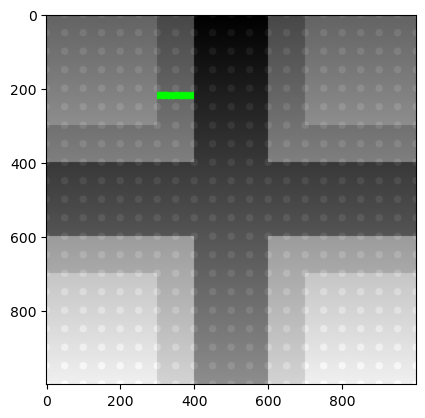

: 

In [ ]:
import numpy as np
from collections import deque
import cv2
import numpy as np
from collections import deque

def region_grow_simple(img, seed, th=5, connectivity=4):
    """
    Region growing by simple intensity difference.
    
    Parameters
    ----------
    img : 2D numpy array (grayscale)
    seed : tuple(int, int)
        (row, col) starting point
    th : float
        intensity difference threshold
    connectivity : int
        4 or 8 connectivity
    
    Returns
    -------
    mask : 2D bool array
        True for pixels included in region
    """
    H, W = img.shape
    r0, c0 = seed
    mask = np.zeros((H, W), dtype=bool)
    visited = np.zeros((H, W), dtype=bool)
    
    # 초기 설정
    region_vals = [float(img[r0, c0])]
    region_mean = region_vals[0]
    
    dq = deque()
    dq.append((r0, c0))
    mask[r0, c0] = True
    visited[r0, c0] = True
    
    if connectivity == 4:
        nbrs = [(-1,0),(1,0),(0,-1),(0,1)]
    else:
        nbrs = [(-1,0),(1,0),(0,-1),(0,1),(-1,-1),(-1,1),(1,-1),(1,1)]
    
    while dq:
        r, c = dq.popleft()
        
        for dr, dc in nbrs:
            rr, cc = r + dr, c + dc
            if not (0 <= rr < H and 0 <= cc < W): continue
            if visited[rr, cc]: continue
            visited[rr, cc] = True
            
            val = float(img[rr, cc])
            if abs(val - img[]) <= th:
                mask[rr, cc] = True
                dq.append((rr, cc))
                region_vals.append(val)
                region_mean = np.mean(region_vals)
    
    return mask

def array_to_uint8_image(arr, vmin=None, vmax=None):
    """
    아무 실수 2D 배열을 0~255 범위의 uint8 이미지로 변환.
    vmin, vmax를 지정하지 않으면 자동으로 최소/최대값 기준 정규화.

    Parameters
    ----------
    arr : 2D numpy array (float)
    vmin, vmax : float or None
        명시적 정규화 기준값. None이면 arr의 min/max 사용.

    Returns
    -------
    img_uint8 : numpy array (uint8)
    """
    arr = np.asarray(arr, dtype=np.float32)
    if vmin is None:
        vmin = np.nanmin(arr)
    if vmax is None:
        vmax = np.nanmax(arr)
    if vmax == vmin:
        vmax = vmin + 1e-9

    norm = (arr - vmin) / (vmax - vmin)
    norm = np.clip(norm, 0, 1)
    img_uint8 = (norm * 255).astype(np.uint8)
    return img_uint8


img = sample
#plt.imshow(img)
seed = (220, 300)  # (row, col)
mask = region_grow_simple(
    img, seed,th=10
)

# 결과 시각화 저장
vis = img.copy()
if vis.ndim == 3:
    vis[mask] = (0, 255, 0)  # 세그먼트 영역을 초록으로
else:
    vis = array_to_uint8_image(vis)
    vis = cv2.cvtColor(vis, cv2.COLOR_GRAY2BGR)
    vis[mask] = (0, 255, 0)

plt.imshow(vis)


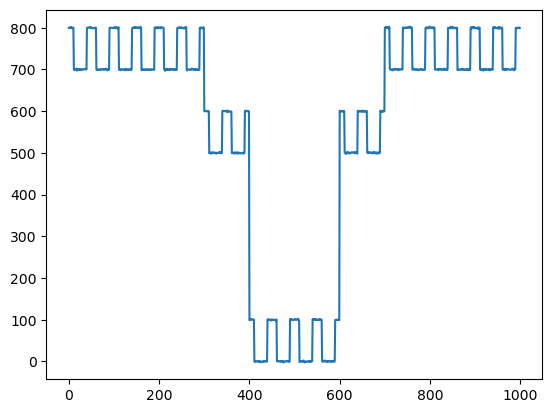

In [58]:
plt.plot(sample[200])

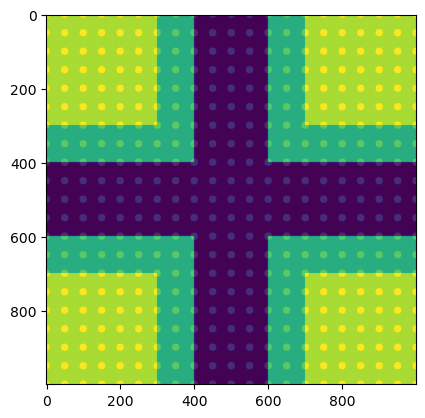

In [57]:
import matplotlib.pyplot as plt

plt.imshow(sample)